# Proyecto Final Analítica de Datos

#### Juan Diego Carvajal Castaño - A00135764
#### Juan Manuel Imbachí Güengue - A00130580

Importamos las librerías que vamos a usar

In [127]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

In [63]:
data = pd.read_csv('2017-18_NBA_salary.csv')

## 1. Limpieza y EDA

El objetivo de esta sección es evaluar la calidad de los datos y tener un entendimiento inicial de la relación entre las variables predictivas y la variable objetivo.

In [64]:
data.shape

(485, 28)

In [65]:
data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Hay 485 registros con 28 variables.
Ahora analizaremos si hay problemas de datos con respecto a valores faltantes y outliers.

In [66]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player,485,483,Kay Felder,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,485,NaN,NaN,NaN,6.63651e+06,7.3926e+06,46080,1.47138e+06,3.20222e+06,1e+07,3.46826e+07
NBA_Country,485,44,USA,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NBA_DraftNumber,485,NaN,NaN,NaN,29.4515,21.1258,1,11,25,47,62
Age,485,NaN,NaN,NaN,26.2639,4.2723,19,23,26,29,41
Tm,485,31,TOT,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,485,NaN,NaN,NaN,50.167,24.8749,1,29,59,71,79
MP,485,NaN,NaN,NaN,1154.14,811.357,1,381,1134,1819,2898
PER,485,NaN,NaN,NaN,13.2608,8.76928,-41.1,9.8,13.2,16.5,134.1
TS%,483,NaN,NaN,NaN,0.535387,0.112352,0,0.5055,0.545,0.5825,1.5


Aparentemente no hay outliers, sin embargo, se puede observar que hay valores faltantes, puesto que el valor de la columna COUNT no es 485 para todas las variables.

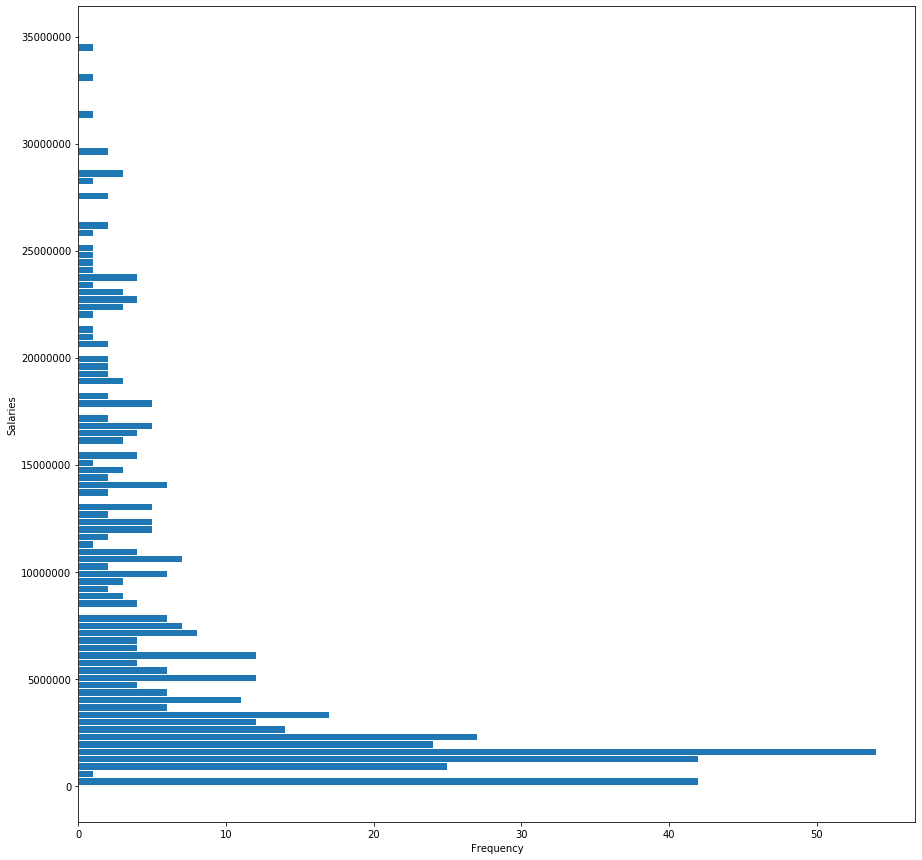

In [67]:
ax = data['Salary'].plot.hist(bins=100, orientation='horizontal', figsize = (15,15), edgecolor='white') 
ax.set_ylabel('Salaries') 
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

Como se puede observar en el histograma, los valores de la variable objetivo no están distribuidos simétricamente pues no vemos una distribución en forma de campana de Gauss.

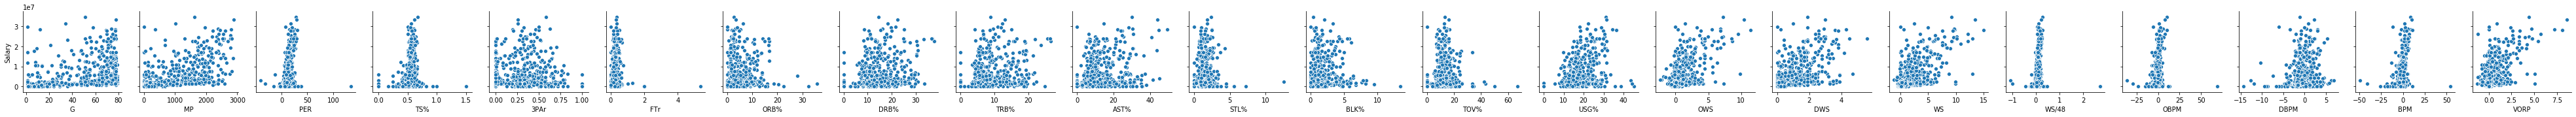

In [68]:
import seaborn as sns
pp = sns.pairplot(data=data,
                  y_vars=['Salary'],
                  x_vars=data.columns[6:])

Con estos diagramas podemos ver la relación existente entre la variable dependiente y las variables independientes, si se observa con atención las variables independientes numéricas, podemos observar si existe una tendencia o correlación entre ella y la variable objetivo, esto puede darnos una idea de que tan bien podría explicar el comportamiento de Y.

### Variables que tienen valores faltantes


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
Player             485 non-null object
Salary             485 non-null int64
NBA_Country        485 non-null object
NBA_DraftNumber    485 non-null int64
Age                485 non-null int64
Tm                 485 non-null object
G                  485 non-null int64
MP                 485 non-null int64
PER                485 non-null float64
TS%                483 non-null float64
3PAr               483 non-null float64
FTr                483 non-null float64
ORB%               485 non-null float64
DRB%               485 non-null float64
TRB%               485 non-null float64
AST%               485 non-null float64
STL%               485 non-null float64
BLK%               485 non-null float64
TOV%               483 non-null float64
USG%               485 non-null float64
OWS                485 non-null float64
DWS                485 non-null float64
WS                 485 non-n

In [70]:
print(pd.isnull(data).any(0)) #el 0 implica cualquier columna, si quisieramos las filas utilizamos 1
print("Las columnas que tienen valores faltantes son: ",pd.isnull(data).any(0).to_numpy().nonzero()[0])
print("y corresponden a: ", data.columns[pd.isnull(data).any(0).to_numpy().nonzero()[0]])

Player             False
Salary             False
NBA_Country        False
NBA_DraftNumber    False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                 True
3PAr                True
FTr                 True
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%                True
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool
Las columnas que tienen valores faltantes son:  [ 9 10 11 18]
y corresponden a:  Index(['TS%', '3PAr', 'FTr', 'TOV%'], dtype='object')


#### Las columnas TS%, 3PAr, FTr, TOV% tienen valores faltantes. 

### Registros repetidos

In [71]:
data['Player'].value_counts()

Kay Felder               3
Ivan Rabb                1
Jeremy Lamb              1
Josh Hart                1
Jeremy Lin               1
E'Twaun Moore            1
Josh Richardson          1
Marreese Speights        1
Matt Williams            1
P.J. Tucker              1
Naz Mitrou-Long          1
Trevor Booker            1
Skal Labissiere          1
Kevin Love               1
Josh Gray                1
Michael Beasley          1
DeMarre Carroll          1
Nate Wolters             1
Damyean Dotson           1
Jameer Nelson            1
Jonathon Simmons         1
Trevor Ariza             1
Malik Monk               1
Caleb Swanigan           1
Giannis Antetokounmpo    1
Kelly Oubre              1
Denzel Valentine         1
Dorian Finney-Smith      1
Dennis Smith             1
Emeka Okafor             1
                        ..
Omri Casspi              1
Ian Mahinmi              1
Kyle Lowry               1
Darius Miller            1
Kyrie Irving             1
Kyle Singler             1
D

In [72]:
data[data['Player'].duplicated(keep=False)]

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
224,Kay Felder,1312611,USA,54,22,DET,1,3,-31.6,0.000,...,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,0.0
225,Kay Felder,1312611,USA,54,22,CHI,14,134,3.6,0.386,...,17.4,28.0,-0.5,0.1,-0.5,-0.166,-8.2,-3.3,-11.5,-0.3
226,Kay Felder,1312611,USA,54,22,TOT,15,137,2.9,0.375,...,17.9,28.4,-0.6,0.1,-0.5,-0.185,-8.7,-3.5,-12.1,-0.3


#### Se encontró que el jugador Kay Felder tiene 3 registros asociados a 3 equipos diferentes durante la temporada

# Valores atípicos

Mediante diagramas de cajas y bigotes visualizamos la distribución de las variables predictoras, para así identificar los posibles valores atípicos. 

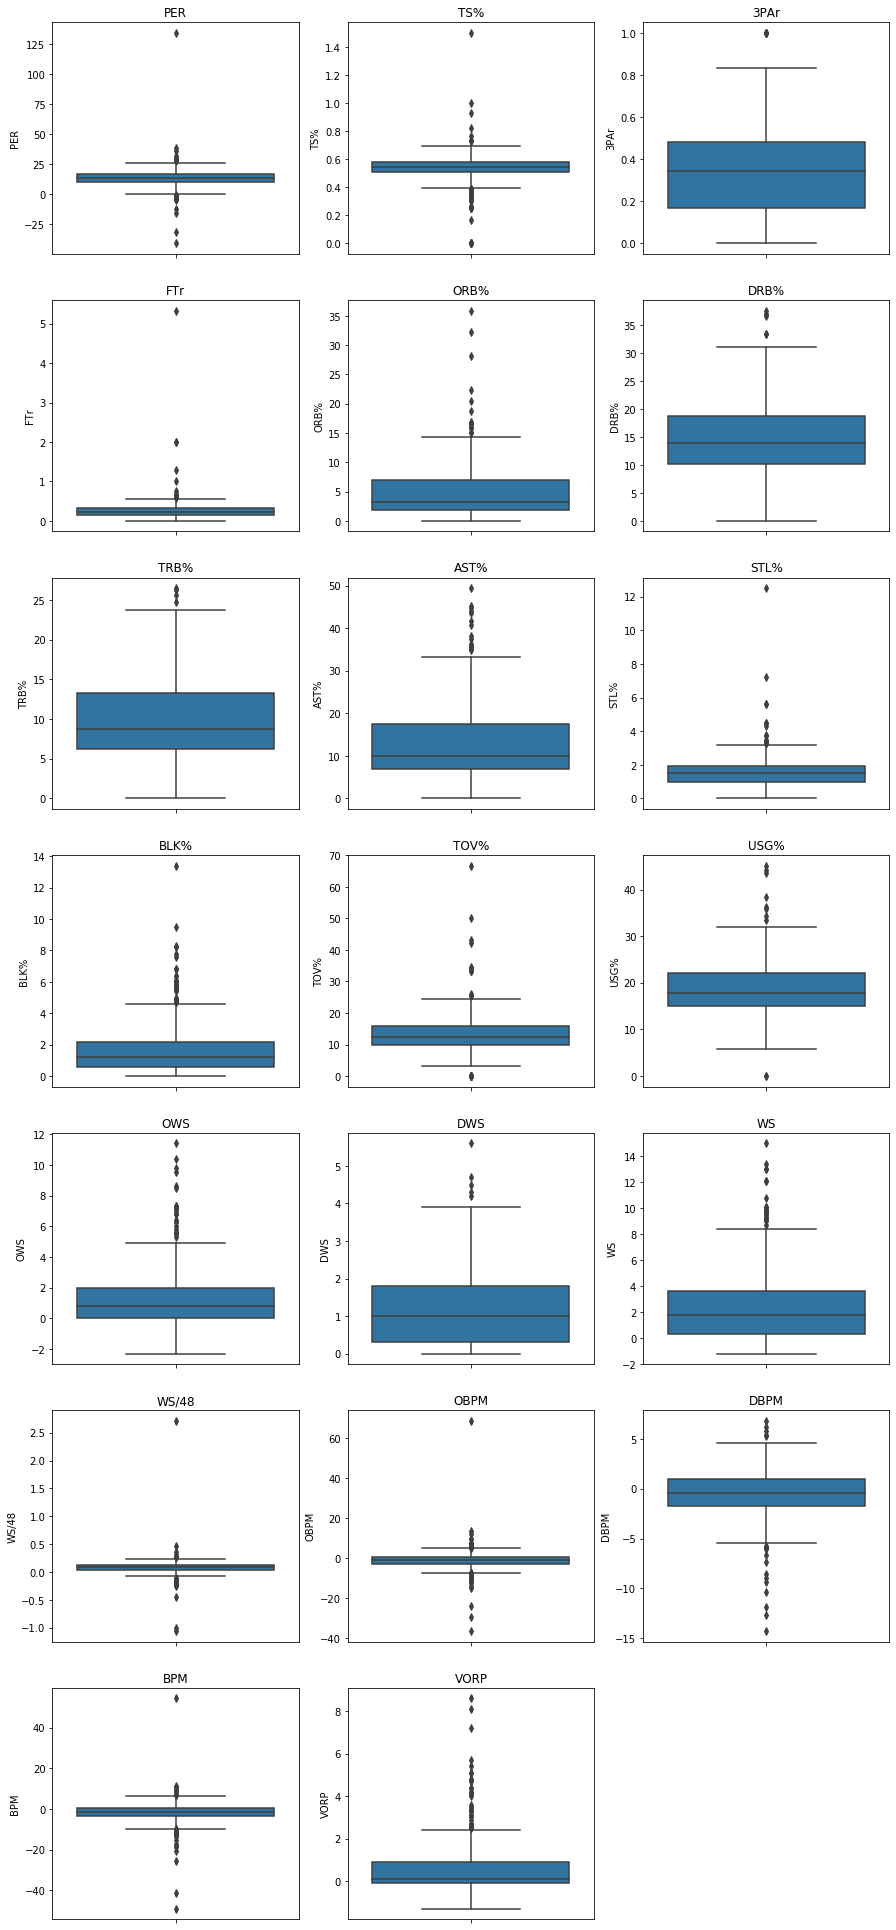

In [73]:
fig = plt.figure(figsize=(15,40))
i=1

for var_num in data.columns[8:]:
    ax = fig.add_subplot(8, 3, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(y=var_num, data=data)
    plt.title(var_num)
    i+=1

# Reporte Primera Entrega

## Calidad de los Datos

Al observar los datos se pudo evidenciar que:
### Faltantes
   Existen datos faltantes para 4 variables: TS%, 3PAr, FTr, TOV%, donde cada una tiene 2 valores nulos o NaN.
### Atípicos
* **PER**
	Se evidencia un dato atípico con valor de 134.1 , el cual se encuentre bastante alejado de su valor inmediatamente anterior que es de 38.1, por lo tanto se debe eliminar en la siguiente fase de la preparación de los datos.
    
    #### [-] Registro: 142.

     Existen 2 datos negativos sospechosos con valores de -41.1 y -31.6, se deben evaluar más adelante y definir si se eliminarán o no.

	#### [-] Registros: 147, 224.


* **TS%**
	Hay un dato atípico de 1.5, se procederá a eliminarlo debido a que está bastante alejado del registro anterior, el cual tiene valor de 1.0.
    
	#### [-] Registro: 142.


* **FTr**
	Existe un valor atípico de 5.3, el cual está bastante alejado del registro anterior, el cual tiene valor de 2.0.
	 Se debe eliminar el dato para que no afecte el modelo en proceso de entrenamiento.
	
	Hay 2 registros con valores de 2.0, se consideran sospechosos y se definirá más adelante si borrarlos o no.

	#### [-] Registro: 165, 396, 84.


* **ORB%**
	Existen 3 valores atípicos 35.9, 32.3 y 28.1. Sin embargo, no serán eliminados pues no están tan lejos ni tan aislados de los demás datos.
	
	#### [-] Registros: 224, 19, 239.
    

* **STL%**
	Se eliminarán el valor atípicos más extremo, correspondiente a 12.5
	
	#### [-] Registros: 231.


* **BLK%**
	Se eliminará el valor atípico más extremo, correspondiente a 13.4
	 
	#### [-] Registros: 19.


* **TOV%**
	
	Se eliminará el valor atípico más extremo, correspondiente a 66.7
	 
	#### [-] Registros: 188.
    

* **WS/48**
	Se eliminará el valor atípico más extremo, correspondientes a 2.713. Los valores atípicos -1.005 y -1.063 se evaluarán más adelante.
	 
	#### [-] Registros: 142, 147, 224.
    

* **OBPM**
	Se eliminará el valor atípico más extremo correspondiente a 68.7.
	 
	#### [-] Registros: 142.
    

* **BPM**
	Se eliminarán los valores atípicos más extremos, tantos positivos como negativos, correspondientes a 54.4, -41.4 y -49.2
	 
	#### [-] Registros: 142, 147, 224.

**Registros a eliminar**

19,142,147,165,188,224,231

**Total: 7**
### Repetidos
   Usando el atributo 'Player' como identificador del registro, se encontró que hay 3 registros repetidos con el valor'Kay Felder', aunque sabemos que es inusual que un jugador sea transferido más de una vez dentro de una misma temporada, dado que es posible realizar dicha transferencia, tomaremos estos 3 registros en el análisis.


### Problemas de escala  
* En el caso de los porcentajes, las variables varían en el orden de magnitud, unas presentan un orden de 10^0 y otras de 10^-1.
* Las variables presentan diferencias significativas en sus promedios, valores mínimos y máximos.
    
   Estos problemas de escala pueden ser consecuencia de valores atípicos que están presentes en los datos.

### Problemas de tipo
* Las características 'NBA_Country', 'Tm' y 'Player' son las únicas de tipo string, por lo que deberían ser convertidas a variables numéricas para ser tomadas en cuenta en el estudio. Sin embargo, consideramos que 'Player' no es relevante para hacer inferencias sobre el posible salario de un jugador.
    
### Distribución de los datos
* Los valores de los percentiles para cada variable varía significativamente, lo que podría indicar sesgos dentro de la distribución.

## Limpieza de los datos

### Eliminación de registros con valores faltantes

In [74]:
cleanData = data.dropna()
print("Datos originales: ", data.shape)
print("Datos completos: ", cleanData.shape)
print("Se eliminaron {} registos".format(data.shape[0] - cleanData.shape[0]))

Datos originales:  (485, 28)
Datos completos:  (483, 28)
Se eliminaron 2 registos


### Eliminación de registros con valores atípicos

In [75]:
data = cleanData.drop([19,142,147,165,188,224,231],axis=0)
print("Datos resultantes: ", data.shape)
print("Se eliminaron {} registos".format(cleanData.shape[0] - data.shape[0]))

Datos resultantes:  (476, 28)
Se eliminaron 7 registos


### Revisión de datos atípicos nuevo Dataset

Text(0.5, 1.0, 'PER')

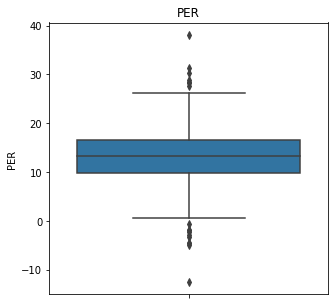

In [76]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['PER'], data=data)
plt.title('PER')

Para la columna PER aún se encuentran valores atípicos, sin embargo, estan relativamente cerca a los límites y tienen sentido para el dominio de la variable, por lo tanto no se eliminarán.

Text(0.5, 1.0, 'TS%')

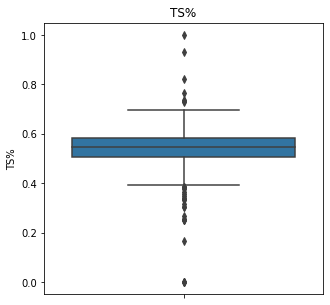

In [77]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['TS%'], data=data)
plt.title('TS%')

Para la columna TS% aún se encuentran valores atípicos, sin embargo, estan relativamente cerca a los límites y tienen sentido para el dominio de la variable, por lo tanto no se eliminarán.

Text(0.5, 1.0, 'FTr')

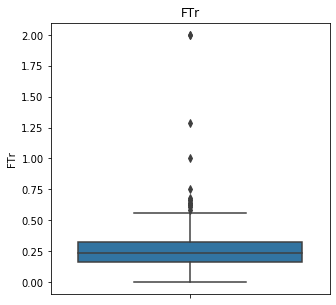

In [78]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['FTr'], data=data)
plt.title('FTr')

Para la columna FTr aún se encuentran valores atípicos, así que se eliminarán los registros asociados más extremos.

In [79]:
cleanData = data[(data['FTr'] < 1.7)]
print("Datos resultantes: ", cleanData.shape)
print("Se eliminaron {} registos".format(data.shape[0] - cleanData.shape[0]))

Datos resultantes:  (474, 28)
Se eliminaron 2 registos


Text(0.5, 1.0, 'FTr')

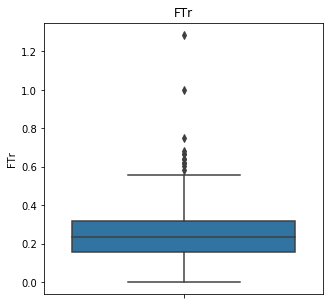

In [80]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=cleanData['FTr'], data=cleanData)
plt.title('FTr')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

In [81]:
data = cleanData

Text(0.5, 1.0, 'STL%')

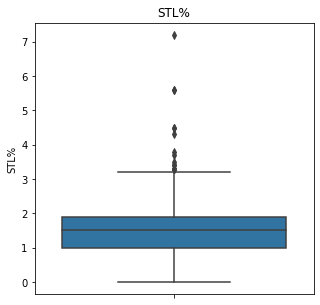

In [82]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['STL%'], data=data)
plt.title('STL%')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'BLK%')

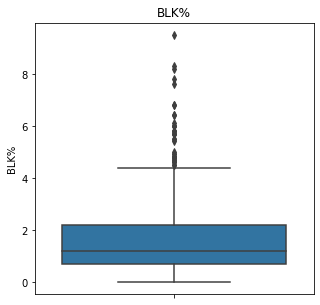

In [83]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['BLK%'], data=data)
plt.title('BLK%')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'TOV%')

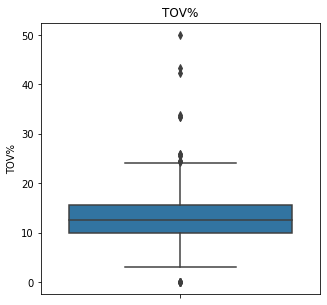

In [84]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['TOV%'], data=data)
plt.title('TOV%')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'WS/48')

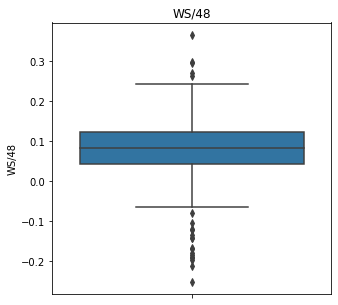

In [85]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['WS/48'], data=data)
plt.title('WS/48')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'OBPM')

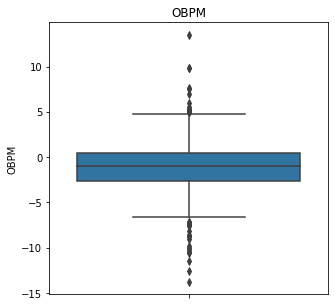

In [86]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['OBPM'], data=data)
plt.title('OBPM')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'BPM')

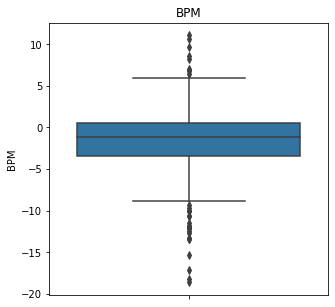

In [87]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['BPM'], data=data)
plt.title('BPM')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

### Dummificación de variables categóricas

dummyCols=pd.get_dummies(data.NBA_Country)
del data['NBA_Country']
dummyCols.columns = 'NBA_Country_' + dummyCols.columns
data = data.join(dummyCols)

dummyCols=pd.get_dummies(data.Tm)
del data['Tm']
dummyCols.columns = 'Tm_' + dummyCols.columns
data = data.join(dummyCols)

#### Nota:
Se realizó el proceso de dummificar las variables categóricas "NBA_Country" y "Tm", sin embargo, al momento de evaluar el modelo no se obtuvo ninguna mejora en las métricas, razón por la cual decidimos no tomar en cuenta estas variables al momento de construir los modelos.

## Modelos Predictivos

### Modelo de Referencia (Baseline)

### Variables independientes y objetivo

In [88]:
x = data.drop(['Salary', 'Player','NBA_Country', 'Tm'],1)
y = data['Salary']
print(x.shape)
print(y.shape)

(474, 24)
(474,)


### 1. Regresión Lineal

#### Protocolo de Evaluación

In [126]:
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn import datasets, linear_model #datasets y modelos de aprendizaje automático (ML)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats #para poder hacer cálculos científicos --> valores p
import statsmodels.api as sm
from math import sqrt

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

In [95]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_train: ",y_test.shape)

x_train:  (331, 24)
x_test:  (143, 24)
y_train:  (331,)
y_train:  (143,)


#### 1.0. Predicción baseline

In [96]:
y_pred = np.full(x_test.shape[0], np.mean(data.Salary))
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('\nR2 adj: %.4f' %r2_aj)

MAE: 5568031.739930955 , R2: -0.0013460163761327415

R2 adj: -0.2050


#### 1.1. Predicción usando todas las variables

In [97]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [98]:
y_train_pred = linear_reg.predict(x_train)
y_test_pred = linear_reg.predict(x_test)
print(y_train_pred.shape)
print(y_test_pred.shape)

(331,)
(143,)


##### 1.1.1. Métricas

In [99]:
print("MAE (train): %.4f" % mean_absolute_error(y_train, y_train_pred))
print("MSE (train): %.4f" % mean_squared_error(y_train, y_train_pred))
print('R2  (train): %.4f' % r2_score(y_train, y_train_pred))
print()
print("MAE (test) : %.4f" % mean_absolute_error(y_test, y_test_pred))
print("MSE (test) : %.4f" % mean_squared_error(y_test, y_test_pred))
print('R2  (test) : %.4f' % r2_score(y_test, y_test_pred))

MAE (train): 3627354.9782
MSE (train): 24092117597402.6719
R2  (train): 0.5710

MAE (test) : 4262148.2406
MSE (test) : 28895621787540.7422
R2  (test) : 0.4457


In [101]:
r2_aj_train = 1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1) / (len(y_train) - x_train.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.5373
R2 adj (test): 0.3329


#### 1.1.2. Análisis de  coeficientes

In [102]:
x2_train = sm.add_constant(x_train)
print(x2_train.head())

     const  NBA_DraftNumber  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
3      1.0               13   22  24   656  14.6  0.499  0.346  0.301   1.4   
228    1.0                1   22  78  2770  24.8  0.645  0.249  0.351   9.3   
301    1.0                9   22  78  1429  17.0  0.648  0.006  0.272  12.4   
286    1.0               22   34  58  1483  11.2  0.487  0.193  0.167   1.5   
399    1.0               27   29  19   141   8.4  0.559  0.489  0.064   2.4   

     ...  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP  
3    ...   9.7  29.5 -0.1  0.5   0.4  0.027  -0.7  -2.0 -2.6  -0.1  
228  ...  10.8  22.9  9.8  3.1  13.0  0.225   4.3   1.0  5.3   5.1  
301  ...  16.2  14.6  2.9  2.2   5.1  0.170   0.3   2.9  3.2   1.9  
286  ...  19.9  16.5  0.3  0.7   1.0  0.032  -2.0  -1.6 -3.6  -0.6  
399  ...  23.7  19.5 -0.2  0.1   0.0 -0.012  -3.5  -1.1 -4.6  -0.1  

[5 rows x 25 columns]


F:\icesi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [104]:
modeloStats = sm.OLS(np.asarray(y_train), x2_train)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     16.97
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           5.41e-43
Time:                        22:14:24   Log-Likelihood:                -5569.2
No. Observations:                 331   AIC:                         1.119e+04
Df Residuals:                     306   BIC:                         1.128e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.934e+06   7.06e+06      0.699      0.485   -8.96e+06    1.88e+07
NBA_DraftNumber -6.478e+04   1.61e+04     -4.027      0.000   -9.64e+04   -3.31e+04
Age              6.143e+05      7e+04      8.770      0.000    4.77e+05    7.52e+05
G               -1.808e+05   3.08e+04     -5.866      0.000   -2.41e+05    -1.2e+05
MP               6647.2327   1411.842      4.708      0.000    3869.086    9425.379
PER             -5.311e+05   4.24e+05     -1.252      0.212   -1.37e+06    3.04e+05
TS%             -1.796e+07   9.83e+06     -1.826      0.069   -3.73e+07    1.39e+06
3PAr             -5.02e+06    3.2e+06     -1.570      0.117   -1.13e+07    1.27e+06
FTr              7.479e+05   2.89e+06      0.259      0.796   -4.94e+06    6.43e+06
ORB%            -2.093e+05   1.11e+06     -0.189      0.851   -2.39e+06    1.98e+06
DRB%             2.632e+05   1.13e+06      0.232      0.817   -1.97e+06     2.5e+06
TRB%            -1.349e+05   2.24e+06     -0.060      0.952   -4.54e+06    4.28e+06
AST%            -1.784e+05   7.26e+04     -2.458      0.015   -3.21e+05   -3.56e+04
STL%            -5.749e+04   5.91e+05     -0.097      0.923   -1.22e+06     1.1e+06
BLK%             1.449e+05   3.98e+05      0.364      0.716   -6.39e+05    9.29e+05
TOV%             1.834e+05    1.1e+05      1.663      0.097   -3.36e+04       4e+05
USG%             2.137e+05   1.64e+05      1.306      0.192   -1.08e+05    5.36e+05
OWS              5.173e+06   5.47e+06      0.945      0.345    -5.6e+06    1.59e+07
DWS              5.081e+06   5.47e+06      0.928      0.354   -5.69e+06    1.59e+07
WS              -5.416e+06   5.46e+06     -0.993      0.322   -1.62e+07    5.32e+06
WS/48             3.26e+07   2.31e+07      1.409      0.160   -1.29e+07    7.81e+07
OBPM             5.098e+06   5.96e+06      0.856      0.393   -6.63e+06    1.68e+07
DBPM             3.863e+06   5.87e+06      0.659      0.511   -7.68e+06    1.54e+07
BPM             -4.118e+06   5.89e+06     -0.700      0.485   -1.57e+07    7.46e+06
VORP             1.469e+06   8.04e+05      1.828      0.069   -1.12e+05    3.05e+06
==============================================================================
Omnibus:                       26.870   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.666
Skew:                           0.530   Prob(JB):                     5.43e-10
Kurtosis:                       4.404   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como puede verse en el resultado de las pruebas de hipótesis los coeficientes que son significativos para el modelo son:
NBA_DraftNumber, Age, G, MP, AST%.

También es posible que haya problemas de multicolinealidad como lo especifica la advertencia #2. A continuación construiremos una matriz de correlación para dar mayor claridad sobre la relación entre las variables.

In [105]:
# Calculamos la matriz de correlaciones
corr_matrix = x_train.join(y_train).corr()
corr_matrix

,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
NBA_DraftNumber,1.000000,0.027979,-0.282847,-0.346984,-0.366332,-0.164489,0.223567,-0.088247,-0.086241,-0.176484,...,-0.295603,-0.284015,-0.323039,-0.324691,-0.272885,-0.311156,-0.144516,-0.313881,-0.269370,-0.349851
Age,0.027979,1.000000,0.093667,0.116491,0.101049,0.090524,0.012019,-0.005010,0.007495,0.012696,...,0.030952,0.164191,0.103481,0.155976,0.116450,0.139185,0.009553,0.110655,0.129026,0.396991
G,-0.282847,0.093667,1.000000,0.862070,0.384300,0.350116,-0.050334,0.041416,-0.071499,0.116889,...,0.097326,0.476901,0.715296,0.609628,0.433377,0.524234,0.363787,0.597482,0.399211,0.236444
MP,-0.346984,0.116491,0.862070,1.000000,0.480185,0.312502,-0.027325,0.050476,-0.121408,0.088846,...,0.323294,0.643131,0.827779,0.770320,0.420969,0.622569,0.288868,0.631052,0.622455,0.474630
PER,-0.366332,0.101049,0.384300,0.480185,1.000000,0.698256,-0.458469,0.436331,0.295666,0.399348,...,0.574616,0.677412,0.547306,0.687396,0.879845,0.823685,0.289361,0.783842,0.627185,0.430147
TS%,-0.164489,0.090524,0.350116,0.312502,0.698256,1.000000,-0.267145,0.293733,0.186795,0.131359,...,0.137761,0.410018,0.307520,0.407011,0.772303,0.715744,0.128692,0.614508,0.316493,0.199065
3PAr,0.223567,0.012019,-0.050334,-0.027325,-0.458469,-0.267145,1.000000,-0.487637,-0.649981,-0.406625,...,-0.164851,-0.163125,-0.165107,-0.177394,-0.356335,-0.039190,-0.311530,-0.200303,-0.117409,-0.082234
FTr,-0.088247,-0.005010,0.041416,0.050476,0.436331,0.293733,-0.487637,1.000000,0.376237,0.374880,...,0.146550,0.264655,0.175601,0.253749,0.431972,0.174290,0.275865,0.283443,0.227880,0.148761
ORB%,-0.086241,0.007495,-0.071499,-0.121408,0.295666,0.186795,-0.649981,0.376237,1.000000,0.516542,...,-0.061331,0.139018,0.078804,0.128061,0.298359,-0.043829,0.218056,0.086198,0.091348,0.010086
DRB%,-0.176484,0.012696,0.116889,0.088846,0.399348,0.131359,-0.406625,0.374880,0.516542,1.000000,...,0.108120,0.248228,0.330343,0.301070,0.355371,0.011491,0.468630,0.264630,0.263941,0.189913


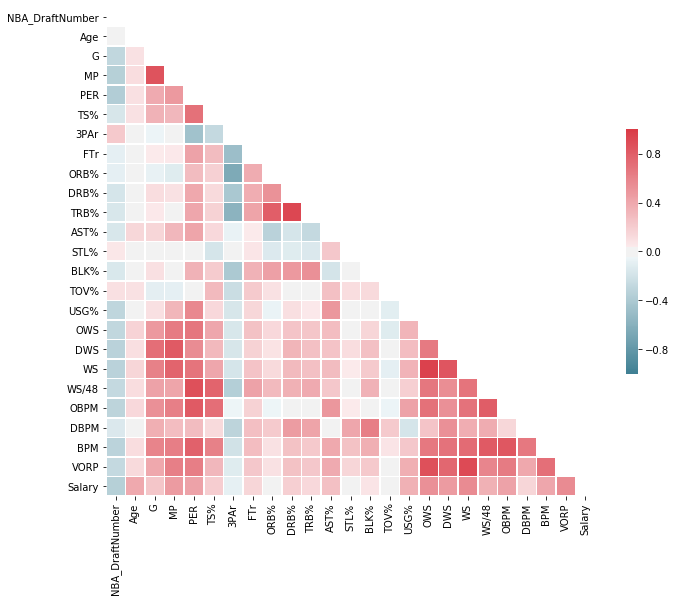

In [106]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Borramos la parte diagonal superior con una máscara
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



Como se puede observar, la variable 3PAr esta fuertemente correlacionada con las variables independientes FTr, ORB%, DRB% y TRB%, por lo que es recomendable eliminarlas al momento de construir el modelo. Sin embargo, se realizará un proceso de selección de variables por medio de Forward y Backward Stepwise.

#### 1.1.3. Selección de variables

In [107]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary             1.000000
VORP               0.561972
WS                 0.554719
OWS                0.528523
DWS                0.474727
MP                 0.474630
OBPM               0.436432
PER                0.430147
BPM                0.413073
Age                0.396991
WS/48              0.352352
USG%               0.352269
AST%               0.265646
G                  0.236444
TS%                0.199065
DRB%               0.189913
DBPM               0.150196
FTr                0.148761
TRB%               0.139816
BLK%               0.075643
ORB%               0.010086
STL%               0.003143
TOV%              -0.022240
3PAr              -0.082234
NBA_DraftNumber   -0.349851
Name: Salary, dtype: float64

##### 1.1.3.1. Forward Stepwise

In [108]:
variables = corr_matrix['Salary'].sort_values(ascending=False).index[1:].values
variables

array(['VORP', 'WS', 'OWS', 'DWS', 'MP', 'OBPM', 'PER', 'BPM', 'Age',
       'WS/48', 'USG%', 'AST%', 'G', 'TS%', 'DRB%', 'DBPM', 'FTr', 'TRB%',
       'BLK%', 'ORB%', 'STL%', 'TOV%', '3PAr', 'NBA_DraftNumber'],
      dtype=object)

In [109]:
import sys
current_variables_forward = np.array([])
max_r2 = -sys.maxsize - 1

while(variables.size > 0):
    max_r2_temp = -sys.maxsize - 1
    max_r2_index = -1
    for j in range(variables.size): 
        
        test_variables = np.copy(current_variables_forward)
        #test_variables.append(variables[j])
        new_test_variable=[variables[j]]
        test_variables = np.concatenate((test_variables, new_test_variable), axis=0)
        x2_train = x_train[test_variables]
        x2_train = sm.add_constant(x2_train)
        modeloStats = sm.OLS(y_train, x2_train)
        results = modeloStats.fit();
        
        if results.rsquared_adj > max_r2_temp:
            max_r2_temp = results.rsquared_adj
            max_r2_index = j
            
        #print('R2_temp adj: %.4f' %results.rsquared_adj,test_variables)
        
    if max_r2 < max_r2_temp:
        max_r2 = max_r2_temp
        new_current_variable=[variables[max_r2_index]]
        current_variables_forward = np.concatenate((current_variables_forward, new_current_variable), axis=0)
        variables = np.delete(variables, max_r2_index)
    else:
        break
        
    print('\nR2 adj: %.4f' %max_r2,current_variables_forward)

print("\n\nSelected variables:",current_variables_forward)


R2 adj: 0.3137 ['VORP']

R2 adj: 0.4194 ['VORP' 'Age']

R2 adj: 0.4701 ['VORP' 'Age' 'NBA_DraftNumber']

R2 adj: 0.4821 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%']

R2 adj: 0.4875 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP']

R2 adj: 0.5334 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G']

R2 adj: 0.5391 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%']

R2 adj: 0.5402 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48']

R2 adj: 0.5440 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48' 'PER']

R2 adj: 0.5441 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48' 'PER' 'DWS']


Selected variables: ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48' 'PER' 'DWS']


#### 1.1.3.2. Backward Stepwise

In [110]:
variables = corr_matrix['Salary'].sort_values(ascending=False).index[1:].values
variables

array(['VORP', 'WS', 'OWS', 'DWS', 'MP', 'OBPM', 'PER', 'BPM', 'Age',
       'WS/48', 'USG%', 'AST%', 'G', 'TS%', 'DRB%', 'DBPM', 'FTr', 'TRB%',
       'BLK%', 'ORB%', 'STL%', 'TOV%', '3PAr', 'NBA_DraftNumber'],
      dtype=object)

In [111]:
current_variables_backward = np.copy(variables)
max_r2 = -sys.maxsize - 1

while(variables.size > 0):
    max_r2_temp = -sys.maxsize - 1
    max_r2_index = -1
    for j in range(variables.size): 
        
        test_variables = np.copy(current_variables_backward)
        #test_variables.append(variables[j])
        test_variables = np.delete(test_variables, j)
        x2_train = x_train[test_variables]
        x2_train = sm.add_constant(x2_train)
        modeloStats = sm.OLS(y_train, x2_train)
        results = modeloStats.fit();
        
        if results.rsquared_adj > max_r2_temp:
            max_r2_temp = results.rsquared_adj
            max_r2_index = j
            
        #print('R2_temp adj: %.4f' %results.rsquared_adj,test_variables)
        
    if max_r2 < max_r2_temp:
        max_r2 = max_r2_temp
        current_variables_backward = np.delete(current_variables_backward, max_r2_index)
        variables = np.delete(variables, max_r2_index)
    else:
        break
        
    print('\nR2 adj: %.4f' %max_r2,current_variables_backward)    

print("\n\nSelected variables:",current_variables_backward)


R2 adj: 0.5388 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'FTr' 'BLK%' 'ORB%' 'STL%' 'TOV%' '3PAr'
 'NBA_DraftNumber']

R2 adj: 0.5403 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'FTr' 'BLK%' 'ORB%' 'TOV%' '3PAr'
 'NBA_DraftNumber']

R2 adj: 0.5417 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'BLK%' 'ORB%' 'TOV%' '3PAr'
 'NBA_DraftNumber']

R2 adj: 0.5428 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'ORB%' 'TOV%' '3PAr' 'NBA_DraftNumber']

R2 adj: 0.5435 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'ORB%' 'TOV%' '3PAr' 'NBA_DraftNumber']

R2 adj: 0.5442 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'Age' 'WS/48' 'USG%' 'AST%' 'G'
 'TS%' 'DRB%' 'ORB%' 'TOV%' '3PAr' 'NBA_DraftNumber']

R2 adj: 0.5445 ['VORP' 'WS' 

#### 1.2. Predicción usando variables seleccionadas (Forward Stepwise)

In [112]:
current_variables_forward

array(['VORP', 'Age', 'NBA_DraftNumber', 'USG%', 'MP', 'G', 'DRB%',
       'WS/48', 'PER', 'DWS'], dtype='<U32')

In [113]:
x_train_filtered = x_train[current_variables_forward]
x_test_filtered = x_test[current_variables_forward]

In [114]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train_filtered, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [115]:
y_train_filtered_pred = linear_reg.predict(x_train_filtered)
y_test_filtered_pred = linear_reg.predict(x_test_filtered)
print(y_train_filtered_pred.shape)
print(y_test_filtered_pred.shape)

(331,)
(143,)


##### 1.2.1. Métricas

In [116]:
print("MAE (train_filtered): %.4f" % mean_absolute_error(y_train, y_train_filtered_pred))
print('R2  (train_filtered): %.4f' % r2_score(y_train, y_train_filtered_pred))
print()
print("MAE (test_filtered) : %.4f" % mean_absolute_error(y_test, y_test_filtered_pred))
print('R2  (test_filtered) : %.4f' % r2_score(y_test, y_test_filtered_pred))

MAE (train_filtered): 3718476.4966
R2  (train_filtered): 0.5579

MAE (test_filtered) : 4123971.3680
R2  (test_filtered) : 0.4791


In [118]:
r2_aj_train_filtered = 1 - (1-r2_score(y_train, y_train_filtered_pred))*(len(y_train)-1) / (len(y_train) - x_train_filtered.shape[1] - 1)
print('R2 adj (train_filtered): %.4f' %r2_aj_train_filtered)
r2_aj_test_filtered = 1 - (1-r2_score(y_test, y_test_filtered_pred))*(len(y_test)-1) / (len(y_test) - x_test_filtered.shape[1] - 1)
print('R2 adj (test_filtered): %.4f' %r2_aj_test_filtered)

R2 adj (train_filtered): 0.5441
R2 adj (test_filtered): 0.4396


#### 1.2. Predicción usando variables seleccionadas (Backward Stepwise)

In [119]:
current_variables_backward

array(['VORP', 'MP', 'OBPM', 'PER', 'Age', 'WS/48', 'USG%', 'AST%', 'G',
       'TS%', 'DRB%', 'ORB%', 'TOV%', '3PAr', 'NBA_DraftNumber'],
      dtype=object)

In [120]:
x_train_filtered = x_train[current_variables_backward]
x_test_filtered = x_test[current_variables_backward]

In [121]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train_filtered, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [122]:
y_train_filtered_pred = linear_reg.predict(x_train_filtered)
y_test_filtered_pred = linear_reg.predict(x_test_filtered)
print(y_train_filtered_pred.shape)
print(y_test_filtered_pred.shape)

(331,)
(143,)


##### 1.2.1. Métricas

In [123]:
print("MAE (train_filtered): %.4f" % mean_squared_error(y_train, y_train_filtered_pred))
print("MAE (test_filtered) : %.4f" % mean_squared_error(y_test, y_test_filtered_pred))
print('R2  (train_filtered): %.4f' % r2_score(y_train, y_train_filtered_pred))
print('R2  (test_filtered) : %.4f' % r2_score(y_test, y_test_filtered_pred))

MAE (train_filtered): 24310471692470.5078
MAE (test_filtered) : 28225421746979.5312
R2  (train_filtered): 0.5671
R2  (test_filtered) : 0.4585


In [124]:
r2_aj_train_filtered = 1 - (1-r2_score(y_train, y_train_filtered_pred))*(len(y_train)-1) / (len(y_train) - x_train_filtered.shape[1] - 1)
print('R2 adj (train_filtered): %.4f' %r2_aj_train_filtered)
r2_aj_test_filtered = 1 - (1-r2_score(y_test, y_test_filtered_pred))*(len(y_test)-1) / (len(y_test) - x_test_filtered.shape[1] - 1)
print('R2 adj (test_filtered): %.4f' %r2_aj_test_filtered)

R2 adj (train_filtered): 0.5464
R2 adj (test_filtered): 0.3946


Dado que los modelos tienen diferente número de predictores, se compararán mediante el R2 ajustado.

En el primer caso, donde se usaron todas las variables independientes, el R2 ajustado para train y test fue de:

* R2 adj (train): 0.5373
* R2 adj (test): 0.3329

En el segundo caso, donde se filtraron las variables predictoras por forward stepwise, el R2 ajustado para train y test fue de:

* R2 adj (train_filtered): 0.5441

* R2 adj (test_filtered): 0.4396

En el tercer caso, donde se filtraron las variables predictoras por backward stepwise, el R2 ajustado para train y test fue de:

* R2 adj (train_filtered): 0.5464

* R2 adj (test_filtered): 0.3946

Se puede observar que en el segundo caso se obtuvo una mejora en las métricas, y por lo tanto, en las predicciones del modelo.

__NOTA:__ 

En cuanto a las variables que al inicio pensábamos que generarían un problema de multicolinealidad (3PAr, FTr, ORB%, DRB% y TRB%), tres quedaron seleccionadas al realizar el backward stepwise.

Al eliminarlas se mejoraba el R2 ajustado para el backward, sin embargo, el R2 ajustado del forward seguía siendo mayor.

### 2. Red Neuronal

In [195]:
import sklearn as sl
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV #permite buscar la mejor configuración de parámetros con C-V
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
#from sklearn.preprocessing import StandardScaler

#### 2.0. Protocolo de evaluación

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

In [199]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_train: ",y_test.shape)

x_train:  (331, 26)
x_test:  (143, 26)
y_train:  (331, 1)
y_train:  (143, 1)


#### 2.1. Predicción baseline

In [200]:
print('El baseline (promedio) para la variable objetivo será de: $USD {:,.0f}'.format(data['Salary'].mean()))

El baseline (promedio) para la variable objetivo será de: $USD 6,772,112


In [201]:
y_pred = np.full(x_test.shape[0], np.mean(data.Salary))
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

MAE: 5568031.739930955 , R2: -0.0013460163761327415


#### 2.2. Modelamiento, con todas las variables
Creamos un modelo de regresión MPLRegressor con tres capas de 30 neuronas cada una.

In [64]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=12345)
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=12345, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
y_pred = mlp.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

MAE: 4130916.683475102 , R2: 0.17183986114041627


Utilizando GridSearchCV, buscaremos la mejor combinación de parámetros para crear nuestra red neuronal.

In [66]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=12345)
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=12345, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [204]:
activation_vec = ['logistic', 'relu', 'tanh']
solver_vec = ['lbfgs', 'sgd', 'adam']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (30,20),
                          (20, 10), (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [206]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(12345)
parametros = {'activation': activation_vec,
              'solver': solver_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }

scoring = {'mae':'neg_mean_absolute_error', 'r2':'r2'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='mae', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+40 minutos)</b></font>

In [69]:
grid.fit(x_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un MAE de {1:.2f} y un R2 de {2:.2f}".format(
    grid.best_params_, grid.best_score_, grid.cv_results_['mean_test_r2'][grid.best_index_]))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (30, 30, 30), 'learning_rate_init': 0.05, 'max_iter': 300}, que permiten obtener un MAE de -3648733.52 y un R2 de 0.50
Tiempo total: 46.98 minutos


### <font color="red"><b>HASTA ACÁ</b></font>

In [70]:
df = pd.DataFrame([(mae*100, r2*100) for (mae, r2) in 
                   zip( 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('MAE', 'R2'))

In [71]:
df.iloc[np.argsort(-df.MAE),]

,MAE,R2
3229,-3.648734e+08,50.151598
3035,-3.659589e+08,50.382017
3034,-3.659589e+08,50.382017
3178,-3.668270e+08,49.915408
3177,-3.668270e+08,49.915408
2881,-3.676909e+08,49.886692
3079,-3.691404e+08,49.568924
3078,-3.691404e+08,49.568924
3077,-3.691404e+08,49.568924
3076,-3.691404e+08,49.568924


In [72]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

In [73]:
y_pred = grid.best_estimator_.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred), "\n")

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

MAE: 4027491.3265883173 , R2: 0.44208258461723726 

R2 adj: 0.3170


In [74]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'MAE', 'R2'))

In [75]:
df.iloc[np.argsort(-df.MAE),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,MAE,R2
3229,relu,"(30, 30, 30)",0.050,300,-3.648734e+08,50.151598
3035,relu,"(20, 20, 20)",0.010,2000,-3.659589e+08,50.382017
3034,relu,"(20, 20, 20)",0.010,1000,-3.659589e+08,50.382017
3178,relu,"(30, 30, 30)",0.009,2000,-3.668270e+08,49.915408
3177,relu,"(30, 30, 30)",0.009,1000,-3.668270e+08,49.915408
2881,relu,"(10, 10, 10)",0.010,2000,-3.676909e+08,49.886692
3079,relu,"(20, 20, 20)",0.050,2000,-3.691404e+08,49.568924
3078,relu,"(20, 20, 20)",0.050,1000,-3.691404e+08,49.568924
3077,relu,"(20, 20, 20)",0.050,500,-3.691404e+08,49.568924
3076,relu,"(20, 20, 20)",0.050,400,-3.691404e+08,49.568924


#### 2.3. Modelamiento variables Forward Stepwise
Creamos un modelo de regresión MPLRegressor con tres capas de 30 neuronas cada una.

In [76]:
x_train_filtered = x_train[current_variables_forward]
x_test_filtered = x_test[current_variables_forward]

In [77]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=12345)
mlp.fit(x_train_filtered,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=12345, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [78]:
y_pred = mlp.predict(x_test_filtered)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

MAE: 4224312.860371331 , R2: 0.28862198856256294


Utilizando GridSearchCV, buscaremos la mejor combinación de parámetros para crear nuestra red neuronal.

In [79]:
activation_vec = ['logistic', 'relu', 'tanh']
solver_vec = ['lbfgs', 'sgd', 'adam']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (30,20),
                          (20, 10), (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [80]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(12345)
parametros = {'activation': activation_vec,
              'solver': solver_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }

scoring = {'mae':'neg_mean_absolute_error', 'r2':'r2'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='mae', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+40 minutos)</b></font>

In [81]:
grid.fit(x_train_filtered, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un MAE de {1:.2f} y un R2 de {2:.2f}".format(
    grid.best_params_, grid.best_score_, grid.cv_results_['mean_test_r2'][grid.best_index_]))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate_init': 0.05, 'max_iter': 400}, que permiten obtener un MAE de -3689813.27 y un R2 de 0.51
Tiempo total: 47.70 minutos


### <font color="red"><b>HASTA ACÁ</b></font>

In [82]:
df = pd.DataFrame([(mae*100, r2*100) for (mae, r2) in 
                   zip( 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('MAE', 'R2'))

In [83]:
df.iloc[np.argsort(-df.MAE),]

,MAE,R2
3076,-3.689813e+08,51.212330
3077,-3.689813e+08,51.212330
3078,-3.689813e+08,51.212330
3079,-3.689813e+08,51.212330
3228,-3.691538e+08,52.087038
2770,-3.704886e+08,51.521698
2771,-3.704886e+08,51.521698
3064,-3.714373e+08,51.347039
2462,-3.733497e+08,51.512774
2463,-3.733497e+08,51.512774


In [84]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

In [85]:
y_pred = grid.best_estimator_.predict(x_test_filtered)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred), "\n")

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

MAE: 3736656.9226349397 , R2: 0.48821595607003765 

R2 adj: 0.3735


In [86]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'MAE', 'R2'))

In [87]:
df.iloc[np.argsort(-df.MAE),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,MAE,R2
3076,relu,"(20, 20, 20)",0.05,400,-3.689813e+08,51.212330
3077,relu,"(20, 20, 20)",0.05,500,-3.689813e+08,51.212330
3078,relu,"(20, 20, 20)",0.05,1000,-3.689813e+08,51.212330
3079,relu,"(20, 20, 20)",0.05,2000,-3.689813e+08,51.212330
3228,relu,"(30, 30, 30)",0.05,200,-3.691538e+08,52.087038
2770,relu,"(20, 10)",0.05,1000,-3.704886e+08,51.521698
2771,relu,"(20, 10)",0.05,2000,-3.704886e+08,51.521698
3064,relu,"(20, 20, 20)",0.04,300,-3.714373e+08,51.347039
2462,relu,"(20, 20)",0.05,1000,-3.733497e+08,51.512774
2463,relu,"(20, 20)",0.05,2000,-3.733497e+08,51.512774


#### 2.4. Modelamiento variables Backward Stepwise
Creamos un modelo de regresión MPLRegressor con tres capas de 30 neuronas cada una.

In [88]:
x_train_filtered = x_train[current_variables_backward]
x_test_filtered = x_test[current_variables_backward]

In [89]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=12345)
mlp.fit(x_train_filtered,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=12345, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [90]:
y_pred = mlp.predict(x_test_filtered)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

MAE: 4131911.097811052 , R2: 0.17898267086096387


Utilizando GridSearchCV, buscaremos la mejor combinación de parámetros para crear nuestra red neuronal.

In [91]:
activation_vec = ['logistic', 'relu', 'tanh']
solver_vec = ['lbfgs', 'sgd', 'adam']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (30,20),
                          (20, 10), (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [92]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(12345)
parametros = {'activation': activation_vec,
              'solver': solver_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }

scoring = {'mae':'neg_mean_absolute_error', 'r2':'r2'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='mae', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+40 minutos)</b></font>

In [93]:
grid.fit(x_train_filtered, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un MAE de {1:.2f} y un R2 de {2:.2f}".format(
    grid.best_params_, grid.best_score_, grid.cv_results_['mean_test_r2'][grid.best_index_]))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.04, 'max_iter': 1000}, que permiten obtener un MAE de -3552242.99 y un R2 de 0.54
Tiempo total: 55.85 minutos


### <font color="red"><b>HASTA ACÁ</b></font>

In [94]:
df = pd.DataFrame([(mae*100, r2*100) for (mae, r2) in 
                   zip( 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('MAE', 'R2'))

In [95]:
df.iloc[np.argsort(-df.MAE),]

,MAE,R2
2451,-3.552243e+08,53.806515
2452,-3.552243e+08,53.806515
3177,-3.568950e+08,53.839365
3178,-3.568950e+08,53.839365
3188,-3.586196e+08,53.058709
3189,-3.586196e+08,53.058709
3057,-3.610488e+08,52.347418
3055,-3.610488e+08,52.347418
3056,-3.610488e+08,52.347418
3054,-3.613665e+08,52.784797


In [96]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

In [97]:
y_pred = grid.best_estimator_.predict(x_test_filtered)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred), "\n")

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

MAE: 3990082.435469344 , R2: 0.42986986464720567 

R2 adj: 0.3021


In [98]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'MAE', 'R2'))

In [99]:
df.iloc[np.argsort(-df.MAE),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,MAE,R2
2451,relu,"(20, 20)",0.040,1000,-3.552243e+08,53.806515
2452,relu,"(20, 20)",0.040,2000,-3.552243e+08,53.806515
3177,relu,"(30, 30, 30)",0.009,1000,-3.568950e+08,53.839365
3178,relu,"(30, 30, 30)",0.009,2000,-3.568950e+08,53.839365
3188,relu,"(30, 30, 30)",0.010,1000,-3.586196e+08,53.058709
3189,relu,"(30, 30, 30)",0.010,2000,-3.586196e+08,53.058709
3057,relu,"(20, 20, 20)",0.030,2000,-3.610488e+08,52.347418
3055,relu,"(20, 20, 20)",0.030,500,-3.610488e+08,52.347418
3056,relu,"(20, 20, 20)",0.030,1000,-3.610488e+08,52.347418
3054,relu,"(20, 20, 20)",0.030,400,-3.613665e+08,52.784797


Dado que los modelos tienen diferente número de predictores, se compararán mediante el R2 ajustado.

En el primer caso, donde se usaron todas las variables independientes, el R2 ajustado fue de:

* R2 adj: 0.3981

En el segundo caso, donde se filtraron las variables predictoras por forward stepwise, el R2 ajustado fue de:

* R2 adj: 0.3636

En el tercer caso, donde se filtraron las variables predictoras por backward stepwise, el R2 ajustado fue de:

* R2 adj: 0.3194

Se puede observar que en el primer caso se obtuvieron las mejores métricas, y por lo tanto, las mejores predicciones del modelo.

### 3. K-Nearest Neighbors

In [130]:
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsRegressor

#### 3.0. Protocolo de evaluación

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

In [132]:
k_vec= np.arange(1,32,2)
k_vec

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

#### 3.1. Predicción con todas las variables

In [133]:
mae_train_vec=[]
mae_test_vec=[]
r2_train_vec=[]
r2_test_vec=[]
y_pred_test_vec=[]
y_pred_train_vec=[]

for k in k_vec:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_train)
    y_pred_train_vec.append(y_pred)
    mae_train_vec.append(mean_absolute_error(y_train, y_pred))
    r2_train_vec.append(r2_score(y_train, y_pred))
    y_pred = knn.predict(x_test)
    y_pred_test_vec.append(y_pred)
    mae_test_vec.append(mean_absolute_error(y_test, y_pred))
    r2_test_vec.append(r2_score(y_test, y_pred))
    r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
    
    print('[+] K:',k, 'MAE:', mean_absolute_error(y_test, y_pred), 'R2:', r2_score(y_test, y_pred), 'R2adj:', r2_aj)


[+] K: 1 MAE: 5546714.916083916 R2: -0.36192858068326883 R2adj: -0.6389310038730862
[+] K: 3 MAE: 4562287.032634033 R2: 0.17238144971323688 R2adj: 0.004052253044742771
[+] K: 5 MAE: 4339023.054545454 R2: 0.2872032282975413 R2adj: 0.1422276137139904
[+] K: 7 MAE: 4507245.08991009 R2: 0.2694776822591587 R2adj: 0.12089687187119103
[+] K: 9 MAE: 4466633.56954157 R2: 0.28553860378082196 R2adj: 0.1402244214989552
[+] K: 11 MAE: 4398757.532739988 R2: 0.3040918577967099 R2adj: 0.1625512187045154
[+] K: 13 MAE: 4571964.219472835 R2: 0.27543975115326047 R2adj: 0.128071564947144
[+] K: 15 MAE: 4593158.663869464 R2: 0.27254603971210456 R2adj: 0.12458930202643093
[+] K: 17 MAE: 4607615.199095023 R2: 0.26713686184734664 R2adj: 0.11807995239256974
[+] K: 19 MAE: 4611058.952521162 R2: 0.2713441040256682 R2adj: 0.12314290484444823
[+] K: 21 MAE: 4589483.264402265 R2: 0.2757896970470197 R2adj: 0.12849268627692212
[+] K: 23 MAE: 4497647.758285193 R2: 0.3023967484181197 R2adj: 0.1605113413167203
[+] K: 25

In [135]:
mae_train_best = k_vec[np.where(mae_train_vec == np.amin(mae_train_vec))[0]]
r2_train_best = k_vec[np.where(r2_train_vec == np.amax(r2_train_vec))[0]]
mae_test_best = k_vec[np.where(mae_test_vec == np.amin(mae_test_vec))[0]]
r2_test_best = k_vec[np.where(r2_test_vec == np.amax(r2_test_vec))[0]]
print("Best K MAE (train):",mae_train_best)
print("Best K R2 (train):",r2_train_best)
print("Best K MAE(test):",mae_test_best,", value:",np.amin(mae_test_vec))
print("Best K R2 (test):",r2_test_best,", value:",np.amax(r2_test_vec))

best_k_y_pred = y_pred_test_vec[(np.where(r2_test_vec == np.amax(r2_test_vec))[0])[0]]

r2_aj = 1 - (1-r2_score(y_test, best_k_y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

print('Best K R2 adj (test): %.4f'%r2_aj)

Best K MAE (train): [1]
Best K R2 (train): [1]
Best K MAE(test): [5] , value: 4339023.054545454
Best K R2 (test): [11] , value: 0.3040918577967099
Best K R2 adj (test): 0.1626


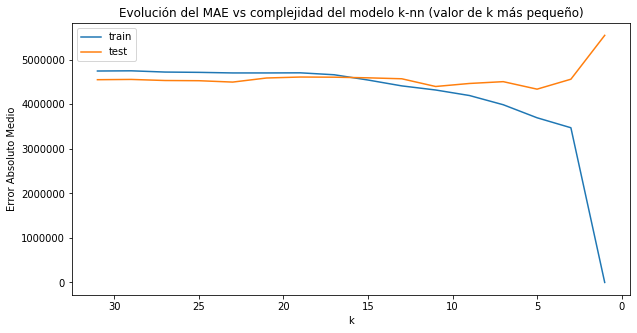

In [136]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, mae_train_vec)
plt.plot(k_vec, mae_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Error Absoluto Medio')
plt.title('Evolución del MAE vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

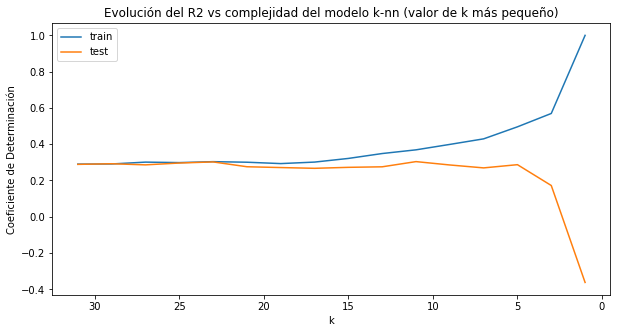

In [137]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, r2_train_vec)
plt.plot(k_vec, r2_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Coeficiente de Determinación')
plt.title('Evolución del R2 vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

#### 3.2. Predicción con variables Forward Stepwise

In [138]:
x_train_filtered = x_train[current_variables_forward]
x_test_filtered = x_test[current_variables_forward]

In [139]:
mae_train_vec=[]
mae_test_vec=[]
r2_train_vec=[]
r2_test_vec=[]
y_pred_test_vec=[]
y_pred_train_vec=[]

for k in k_vec:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_filtered, y_train)
    y_pred = knn.predict(x_train_filtered)
    y_pred_train_vec.append(y_pred)
    mae_train_vec.append(mean_absolute_error(y_train, y_pred))
    r2_train_vec.append(r2_score(y_train, y_pred))
    y_pred = knn.predict(x_test_filtered)
    y_pred_test_vec.append(y_pred)
    mae_test_vec.append(mean_absolute_error(y_test, y_pred))
    r2_test_vec.append(r2_score(y_test, y_pred))
    r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
    
    print('[+] K:',k, '\tMAE:', mean_absolute_error(y_test, y_pred), '\tR2:', r2_score(y_test, y_pred), '\t\tR2adj:', r2_aj)


[+] K: 1 	MAE: 5207393.979020979 	R2: -0.24892002625004284 		R2adj: -0.5029376587076788
[+] K: 3 	MAE: 4721191.575757576 	R2: 0.09633017018867507 		R2adj: -0.0874670833322726
[+] K: 5 	MAE: 4456416.66993007 	R2: 0.2625669119405709 		R2adj: 0.11258052114882267
[+] K: 7 	MAE: 4444663.63036963 	R2: 0.2809944890861894 		R2adj: 0.1347560800867702
[+] K: 9 	MAE: 4492940.041958042 	R2: 0.28008252450955384 		R2adj: 0.13365863118946308
[+] K: 11 	MAE: 4448313.387158295 	R2: 0.29475150800252714 		R2adj: 0.1513111367488038
[+] K: 13 	MAE: 4561382.992469069 	R2: 0.28547386085921367 		R2adj: 0.14014651052549443
[+] K: 15 	MAE: 4593828.025174825 	R2: 0.27588228942925985 		R2adj: 0.12860411100809244
[+] K: 17 	MAE: 4587131.528177705 	R2: 0.27321522609998916 		R2adj: 0.12539459412032594
[+] K: 19 	MAE: 4621796.016194331 	R2: 0.2718372972152454 		R2adj: 0.1237364085132614
[+] K: 21 	MAE: 4577314.418581419 	R2: 0.27651791914264867 		R2adj: 0.12936902134115347
[+] K: 23 	MAE: 4512111.503496503 	R2: 0.300

In [141]:
mae_train_best = k_vec[np.where(mae_train_vec == np.amin(mae_train_vec))[0]]
r2_train_best = k_vec[np.where(r2_train_vec == np.amax(r2_train_vec))[0]]
mae_test_best = k_vec[np.where(mae_test_vec == np.amin(mae_test_vec))[0]]
r2_test_best = k_vec[np.where(r2_test_vec == np.amax(r2_test_vec))[0]]
print("Best K MAE (train):",mae_train_best)
print("Best K R2 (train):",r2_train_best)
print("Best K MAE(test):",mae_test_best,", value:",np.amin(mae_test_vec))
print("Best K R2 (test):",r2_test_best,", value:",np.amax(r2_test_vec))

best_k_y_pred = y_pred_test_vec[(np.where(r2_test_vec == np.amax(r2_test_vec))[0])[0]]

r2_aj = 1 - (1-r2_score(y_test, best_k_y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

print('Best K R2 adj (test): %.4f'%r2_aj)

Best K MAE (train): [1]
Best K R2 (train): [1]
Best K MAE(test): [7] , value: 4444663.63036963
Best K R2 (test): [23] , value: 0.3005069174192918
Best K R2 adj (test): 0.1582


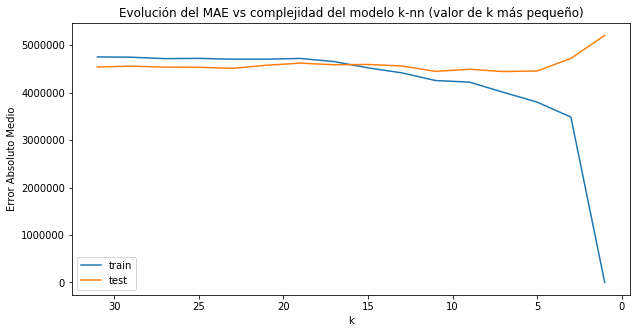

In [142]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, mae_train_vec)
plt.plot(k_vec, mae_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Error Absoluto Medio')
plt.title('Evolución del MAE vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

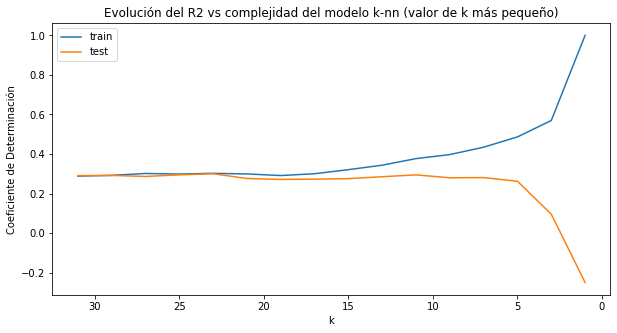

In [143]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, r2_train_vec)
plt.plot(k_vec, r2_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Coeficiente de Determinación')
plt.title('Evolución del R2 vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

#### 3.2. Predicción con variables Backward Stepwise

In [144]:
x_train_filtered = x_train[current_variables_backward]
x_test_filtered = x_test[current_variables_backward]

In [145]:
mae_train_vec=[]
mae_test_vec=[]
r2_train_vec=[]
r2_test_vec=[]
y_pred_test_vec=[]
y_pred_train_vec=[]

for k in k_vec:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_filtered, y_train)
    y_pred = knn.predict(x_train_filtered)
    y_pred_train_vec.append(y_pred)
    mae_train_vec.append(mean_absolute_error(y_train, y_pred))
    r2_train_vec.append(r2_score(y_train, y_pred))
    y_pred = knn.predict(x_test_filtered)
    y_pred_test_vec.append(y_pred)
    mae_test_vec.append(mean_absolute_error(y_test, y_pred))
    r2_test_vec.append(r2_score(y_test, y_pred))
    r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
    
    print('[+] K:',k, '\tMAE:', mean_absolute_error(y_test, y_pred), '\tR2:', r2_score(y_test, y_pred), '\t\tR2adj:', r2_aj)


[+] K: 1 	MAE: 5598996.951048951 	R2: -0.35335853364460923 		R2adj: -0.6286178964197839
[+] K: 3 	MAE: 4570532.692307692 	R2: 0.15348839414232474 		R2adj: -0.01868345789652448
[+] K: 5 	MAE: 4431855.047552447 	R2: 0.25698197323353544 		R2adj: 0.10585966270476299
[+] K: 7 	MAE: 4490250.708291709 	R2: 0.27256664592080093 		R2adj: 0.12461409932842149
[+] K: 9 	MAE: 4501291.9836829845 	R2: 0.27961873966544304 		R2adj: 0.1331005172245161
[+] K: 11 	MAE: 4424920.462174189 	R2: 0.30229861901754207 		R2adj: 0.16039325339399124
[+] K: 13 	MAE: 4571883.399139322 	R2: 0.27561875247147594 		R2adj: 0.1282869733131321
[+] K: 15 	MAE: 4616262.173426573 	R2: 0.270815437110961 		R2adj: 0.12250671245556333
[+] K: 17 	MAE: 4606490.2274784045 	R2: 0.26742236185333346 		R2adj: 0.11842352019638436
[+] K: 19 	MAE: 4594838.881486934 	R2: 0.273087009486348 		R2adj: 0.12524029955136795
[+] K: 21 	MAE: 4576765.939393939 	R2: 0.2779348472291161 		R2adj: 0.13107413819097025
[+] K: 23 	MAE: 4516433.304043782 	R2: 0

In [146]:
mae_train_best = k_vec[np.where(mae_train_vec == np.amin(mae_train_vec))[0]]
r2_train_best = k_vec[np.where(r2_train_vec == np.amax(r2_train_vec))[0]]
mae_test_best = k_vec[np.where(mae_test_vec == np.amin(mae_test_vec))[0]]
r2_test_best = k_vec[np.where(r2_test_vec == np.amax(r2_test_vec))[0]]
print("Best K MAE (train):",mae_train_best)
print("Best K R2 (train):",r2_train_best)
print("Best K MAE(test):",mae_test_best,", value:",np.amin(mae_test_vec))
print("Best K R2 (test):",r2_test_best,", value:",np.amax(r2_test_vec))

best_k_y_pred = y_pred_test_vec[(np.where(r2_test_vec == np.amax(r2_test_vec))[0])[0]]

r2_aj = 1 - (1-r2_score(y_test, best_k_y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

print('Best K R2 adj (test): %.4f'%r2_aj)

Best K MAE (train): [1]
Best K R2 (train): [1]
Best K MAE(test): [11] , value: 4424920.462174189
Best K R2 (test): [11] , value: 0.30229861901754207
Best K R2 adj (test): 0.1604


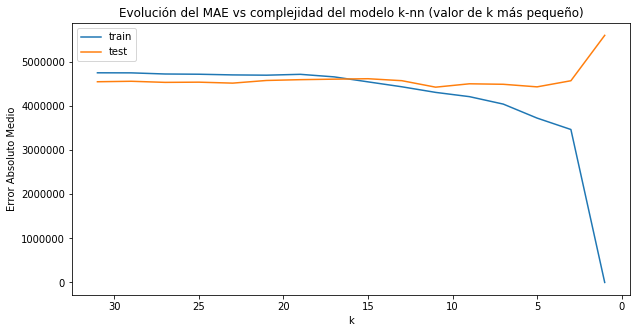

In [147]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, mae_train_vec)
plt.plot(k_vec, mae_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Error Absoluto Medio')
plt.title('Evolución del MAE vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

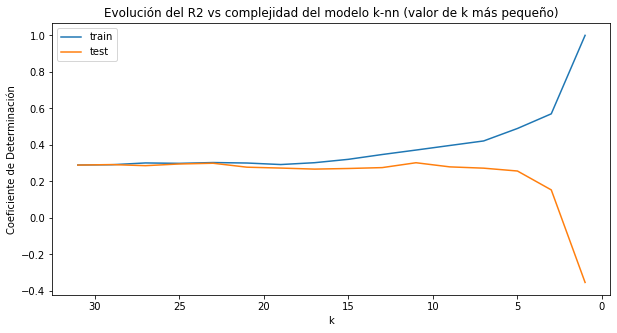

In [148]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, r2_train_vec)
plt.plot(k_vec, r2_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Coeficiente de Determinación')
plt.title('Evolución del R2 vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

Dado que los modelos tienen diferente número de predictores, se compararán mediante el R2 ajustado.

En el primer caso, donde se usaron todas las variables independientes, el R2 ajustado fue de:

* R2 adj: 0.1626

En el segundo caso, donde se filtraron las variables predictoras por forward stepwise, el R2 ajustado fue de:

* R2 adj: 0.1582

En el tercer caso, donde se filtraron las variables predictoras por backward stepwise, el R2 ajustado fue de:

* R2 adj: 0.1604

Se puede observar que en el primer caso se obtuvieron las mejores métricas, y por lo tanto, las mejores predicciones del modelo.

## Comparación de Modelos

* R2 ajustado Regresión Lineal: 0.4396

* R2 ajustado Redes Neuronales: 0.3981

* R2 ajustado K-Nearest Neighbors: 0.1626

Se observa que el modelo con mejor métrica es el de Regresión Lineal, y por ende, el que da las mejores predicciones.

# Maousekeherramientas para usar más adelante


In [117]:
# Filtrado
#data['FTr'].sort_values(ascending=False)

In [118]:
# Obtener registro por index
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#data.iloc[163:164]

In [119]:
#Matriz de correlación
#pd.plotting.scatter_matrix(data.iloc[6:], figsize=(50,50))